# Harmonics

We have spent a lot of time talking about sinusoids in the previous lessons, but in this lesson, we are going to cover a phenomenon that occurs in real-world signals.

Whenever we have a non-sinusoidal periodic signal, we will see periodic spikes in the frequency domain. The first spike will occur at the fundamental frequency, and the following spikes are known as **harmonics**.

Let's see this for ourselves.

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import mpld3
import scipy as sp
from scipy import io, signal

In [2]:
import mpld3
mpld3.enable_notebook()

Load an accelerometer signal from the wrist while jogging.

In [4]:
sig = sp.io.loadmat("DATA_11_TYPE02.mat")['sig']
fs = 125
seg = sig[3][9000:10000]
seg -= np.mean(seg)

And plot it...

In [5]:
%matplotlib inline

Text(0.5, 0, 'Time (sec)')

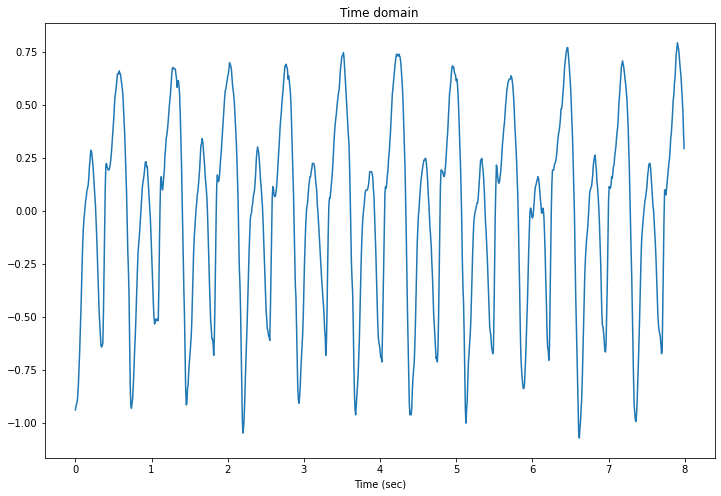

In [6]:
ts = np.arange(len(seg)) / fs
plt.figure(figsize=(12, 8))
plt.plot(ts, seg)
plt.title('Time domain')
plt.xlabel('Time (sec)')

And let's look at the Fourier transform...

In [7]:
nfft = len(seg)
fft = np.fft.rfft(seg)
freqs = np.fft.rfftfreq(len(seg), 1/fs)

Text(0.5, 0, 'Frequency (Hz)')

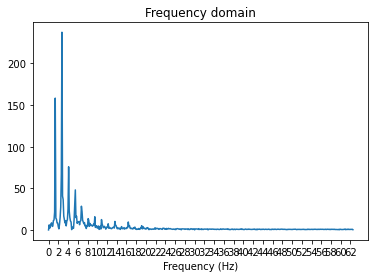

In [8]:
plt.clf()
plt.plot(freqs, np.abs(fft))
plt.xticks(np.arange(0, freqs[-1], 2));
plt.title('Frequency domain')
plt.xlabel('Frequency (Hz)')

Lo and behold, we find periodic spikes in the frequency domain!

The first one occurs at roughly 1.375 Hz. This is our fundamental frequency.

In [9]:
fundamental = freqs[np.argmax(np.abs(fft[freqs < 2]))]
fundamental

1.375

Let's compute integer multiples of this fundamental frequency and see how well they match up with our spikes.

In [10]:
harmonics = fundamental * np.arange(1, 9)
harmonics

array([ 1.375,  2.75 ,  4.125,  5.5  ,  6.875,  8.25 ,  9.625, 11.   ])

Text(0.5, 0, 'Frequency (Hz)')

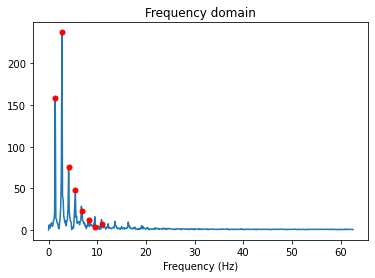

In [11]:
plt.clf()
plt.plot(freqs, np.abs(fft))
plt.plot(harmonics, np.abs(fft[np.isin(freqs, harmonics)]), 'r.', ms=10)
plt.title('Frequency domain')
plt.xlabel('Frequency (Hz)')

We can see that the other spikes do indeed correspond to harmonic frequencies of the fundamental frequency.

In fact, if we plot a marker on the original time-domain signal at 1.375 Hz, we can see that it roughly follows the periodicity of that signal or the cadence of the arm swing.

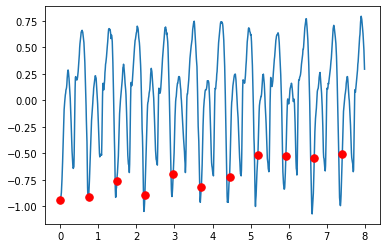

In [12]:
plt.clf()
plt.plot(ts, seg)
mts = np.mod(ts, 1/1.35)
pds = (mts < mts[1]).nonzero()[0]
plt.plot(ts[pds], seg[pds], 'r.', ms=15)

This phenomenon is important to be aware of as we start to process real world signals. Don't forget that you're no longer dealing with sinusoids.

[Explanation](https://www.youtube.com/watch?v=byUGEDUj-mE&t=3s)